# Stability condition on van der Waals isotherms


**Code:** #11A-000

**File:** `apps/van_der_waals/stability.ipynb`

**Run it online:** [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jongablop/MinervaLab/master?urlpath=%2Fnotebooks%2Fapps%2Fvan_der_waals%2Fstability.ipynb)

-----------

The aim of this notebook is to visualize the $\left(\frac{\partial p}{\partial v}\right)_{T,N} < 0$ stability condition on van der Waals isotherms.

## Interface

The main interface (``main_block_11A_000``) is divided in two HBox: ``top_block_11A_000`` and ``bottom_block_11A_000``. ``bottom_block_11A_000`` contains of 2 bqplot Figures: ``fig_11A_001`` and ``fig_11A_002``.  

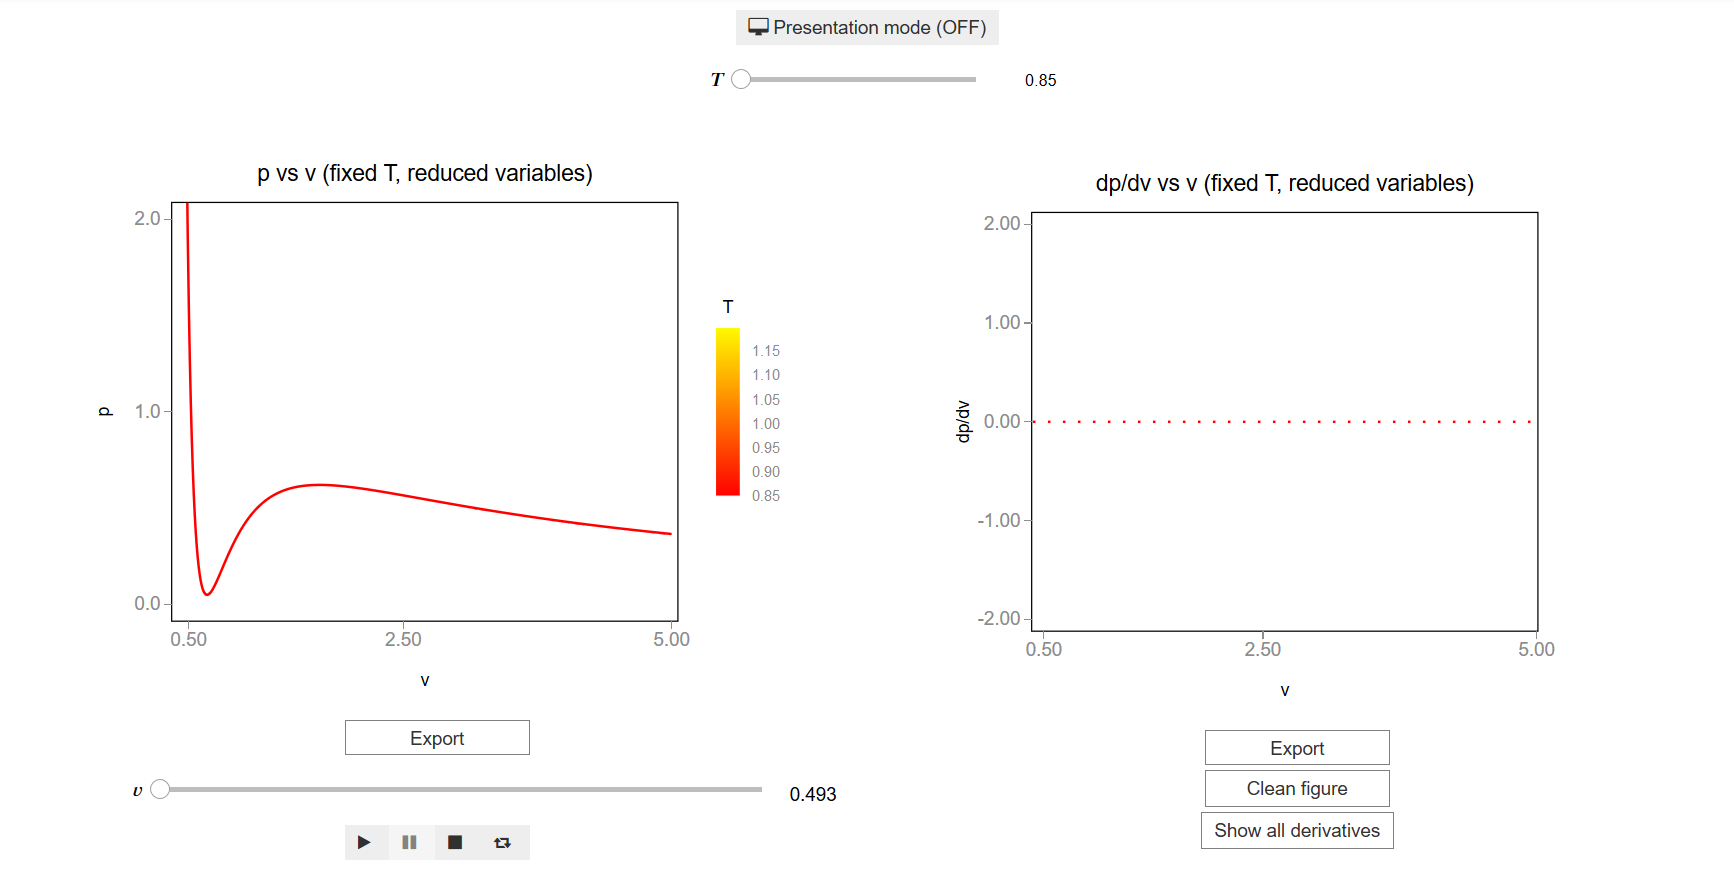

In [1]:
from IPython.display import Image
Image(filename='../../static/images/11A-000_1.png')

The slider ``T_slider`` updates the values of $T$ which updates the lines of ``fig_11A_001`` and ``fig_11A_002``.

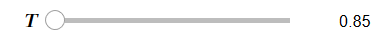

In [2]:
Image(filename='../../static/images/11A-000_2.png')

## CSS
A custom `css` file is used to improve the interface of this application. It can be found [here](https://github.com/jongablop/MinervaLab/blob/master/static/custom.css).

In [3]:
from IPython.display import HTML
display(HTML("<head><link rel='stylesheet' type='text/css' href='./../../static/custom.css'></head>"))
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.widget-label { display: contents !important; }</style>"))
display(HTML("<style>.slider-container { margin: 12px !important; }</style>"))
display(HTML("<style>.jupyter-widgets { overflow: auto !important; }</style>"))

## Packages

In [4]:
from bqplot import *
import bqplot as bq
import bqplot.marks as bqm
import bqplot.scales as bqs
import bqplot.axes as bqa

import ipywidgets as widgets

import urllib.parse
import webbrowser

import sys

## Physical functions

This are the functions that have a physical meaning:

- `get_relative_isotherms`
- `get_derivative_y_by_x`

In [5]:
def get_relative_isotherms(v_range, T_range):
    """This function calculates the theoretical p(v, T) plane 
        (in reduced coordinates) according to van der Waals
        equation of state from a given range of volumes
        and tenperatures.

    Args:
        v_range: An array containing the values of v
        (in reduced coordinates)for which the isotherms must be 
        calculated.\n
        T_range: An array containing the values of T
        (in reduced coordinates)for which the isotherms must be 
        calculated.\n

        
    Returns:
        isotherms: A list consisted of numpy arrays containing the
        pressures of each isotherm.
    """

    isotherms = []

    for T in T_range:
        p_R = []
        for v in v_range:
            val = (8.0/3.0*T/(v - 1.0/3.0) - 3.0/v**2)
            p_R = np.append(p_R, val)

        isotherms.append(p_R)

    return isotherms

In [6]:
def get_derivative_y_by_x(y_values, x_values):
    """This function calculates the derivative an y array
    with respect to an x array calculated with the difference quotient.
    
    Args:
        y_values: An array containing the values of y.\n
        x_values: An array containing the values of x.\n

        
    Returns:
        der: An array containing the values of the
        derivative of y_values with respect to x_values.
    """
    
    der = []
    
    
    for i in range(len(x_values)):

        x = x_values[i]
        y = y_values[i]
        
        d = []
        
        l = np.size(y)
        
        for j in range(1, l):
            d.append((y[j] - y[j-1])/(x[j] - x[j-1]))
        
        der.append(d)
        
    return der

## Functions related to interaction

In [7]:
def update_tracer(change):
    """This function updates the marks 'tracer_11A_001' and
    'lines_11A_002' from figures 'fig_11A_001' and
    'fig_11A_002'.
    """
    
    tracer_11A_001.visible = True
    
    i = change.get('owner').value
    v = dense_v_values_filtered[T_slider.index][i]
    p = dense_p_values_filtered[T_slider.index][i]

    tracer_11A_001.x, tracer_11A_001.y = [v], [p]
    
    x_values = np.append(lines_11A_002.x, v)
    y_values = np.append(lines_11A_002.y, der[T_slider.index][i])
    
    lines_11A_002.x, lines_11A_002.y = x_values, y_values

In [8]:
def restart_derivative(a):
    """This function clears the mark 'lines_11A_002'
    from figure 'fig_11A_002' when 'restart_button' is pressed.
    """
    
    lines_11A_002.x, lines_11A_002.y = [], []

In [9]:
def change_tenperature(change):
    """This function changes the tenperature of the
    marks 'lines_11A_002' and 'tracer_11A_001' from figures
    'fig_11A_002' and 'fig_11A_003'.
    """
    
    v_slider.max = len(dense_v_values_rounded[T_slider.index])-2
    restart_derivative(None)
    
    obj = change.owner
    
    opacities = [0.0 for t in T_values]
    opacities[T_slider.index] = 1.0
    lines_11A_001.opacities = opacities

    lines_11A_002.x, lines_11A_002.y = p_values[T_slider.index], v_values
    
    tracer_11A_001.x, tracer_11A_001.y = [lines_11A_002.x[0]], [lines_11A_002.y[0]]

In [10]:
def show_all_derivatives(change):
    """This function shows all the calculated derivatives in 
    'lines_11A_002'.
    """
    
    lines_11A_002.x, lines_11A_002.y = [v.tolist()[:-1] for v in dense_v_values_filtered], der

In [11]:
def update_text(change):
    """This function update the volume of the 'tracer_11A_001'
    shown in 'v_text' widget.
    """
    
    obj = change.owner
    i = obj.value
    
    v_text.value = '<p>' + str(dense_v_values_rounded[T_slider.index][i])+ '</p>'

In [12]:
def change_view(change):
    """This function changes the visualization of all the
    components of the application so they are suitable for
    a projection.\n
    """
    
    obj = change.owner

    if obj.value:
        
        obj.description = 'Presentation mode (ON)'
        
        display(HTML(
            "<style>" \
            ".widget-readout { font-size: 30px ; }" \
            ".widget-label-basic {font-size: 30px;}" \
            "option {font-size: 25px;}" \
            ".p-Widget.jupyter-widgets.widget-slider.widget-vslider.widget-inline-vbox {width: auto}" \
            ".p-Widget .jupyter-widgets .widgets-label {width: auto; height: auto; font-size: 30px;}" \
            ".widget-label {font-size: 30px ; height: auto !important;}" \
            ".p-Widget .bqplot .figure .jupyter-widgets {height: auto !important;}" \
            ".widget-text input[type='number'] {font-size: 30px;height: auto;}" \
            ".option { font-size: 30px ;}" \
            ".p-Widget .jupyter-widgets .jupyter-button.widget-button {font-size: 30px ; width: auto; height: auto;}" \
            ".p-Widget.jupyter-widgets.jupyter-button.widget-toggle-button{font-size: 30px ; width: auto; height: auto;}" \
            ".p-Widget.p-Panel.jupyter-widgets.widget-container.widget-box.widget-vbox {padding-bottom: 30px}" \
            ".bqplot > svg .axis text.axislabel, .bqplot > svg .axis tspan.axislabel {font-size: 30px;}" \
            ".q-grid .slick-cell {font-size: 30px;}" \
            ".slick-column-name {font-size: 30px;}" \
            ".widget-html-content {font-size: 30px;}"
            "</style>"
            )
        )

        for figure in figures:
            
            figure.legend_text = {'font-size': '30px'}
            figure.title_style = {'font-size': '30px'}

            for axis in figure.axes:
                axis.tick_style = {'font-size': '30px'}
                axis.label_style = {'font-size': '30px'}
        
    else:
        
        obj.description = 'Presentation mode (OFF)'
        
        display(HTML(
            "<style>" \
            ".widget-readout { font-size: 14px ;}" \
            ".widget-label-basic {font-size: 14px;}" \
            "option {font-size: 12px;}" \
            ".p-Widget .jupyter-widgets .widgets-label {font-size: 14px;}" \
            ".widget-label {font-size: 14px ;}" \
            ".widget-text input[type='number'] {font-size: 14px;}" \
            ".option { font-size: 14px ;}" \
            ".p-Widget .jupyter-widgets .jupyter-button.widget-button {font-size: 14px;}" \
            ".p-Widget.jupyter-widgets.jupyter-button.widget-toggle-button {font-size: 14px;}" \
            ".bqplot > svg .axis text.axislabel, .bqplot > svg .axis tspan.axislabel {font-size: 14px;}" \
            ".q-grid .slick-cell {font-size: 14px;}" \
            ".slick-column-name {font-size: 14px;}" \
            ".widget-html-content {font-size: 14px;}"
            "</style>"
            )
        )
        
        for figure in figures:
            
            figure.legend_text = {'font-size': '14px'}
            figure.title_style = {'font-size': '20px'}

            for axis in figure.axes:
                axis.tick_style = {'font-size': '14px'}
                axis.label_style = {'font-size': '14px'}

In [13]:
def prepare_export(button):
    """This function sends the selected plot to the 'export_plot'
    function.
    """

    if button is prepare_export_fig_11A_001_button:
        
        export_plot(fig_11A_001)
        
    elif button is prepare_export_fig_11A_002_button:
        
        export_plot(fig_11A_002)

In [14]:
def export_plot(plot):
    """This function sends the selected plot to the export module.
    """
    
    global data
    
    text_lines = []
    
    np.set_printoptions(threshold=sys.maxsize)
    
    tooltips = []
    
    for mark in plot.marks:
        tooltips.append(mark.tooltip)
        mark.tooltip = None
    
    data =  repr((plot, text_lines))
    
    %store data
    
    rel_url = "../../../apps/modules/export_module.ipynb"
    abs_url = urllib.parse.urljoin(notebook_url, rel_url)

    if not webbrowser.open(abs_url):
        go_to_export_button.value = "<form action=" + abs_url + " target='_blank'><button type=''submit''>Open in export module</button></form>"
        
    for i in range(len(plot.marks)):
        mark = plot.marks[i]
        mark.tooltip = tooltips[i]

In [15]:
%%javascript 

//Get the URL of the current notebook

var kernel = Jupyter.notebook.kernel; 
var command = ["notebook_url = ",
               "'", window.location.href, "'" ].join('')

kernel.execute(command)

<IPython.core.display.Javascript object>

## Main interface

In [ ]:
v_values = np.linspace(0.4, 5.0, 500)
T_values = [0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2]

p_values = get_relative_isotherms(v_values, T_values)

################################
######TOP BLOCK#################
################################

top_block = widgets.VBox(
    [],
    layout=widgets.Layout(align_items='center')
)

T_slider = widgets.SelectionSlider(
    options= T_values,
    value=T_values[0],
    description=r'\( T \)',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    layout = widgets.Layout(
        width = '300px',
        height = 'auto',
        margin='0 0 0 50px'
    )
)

T_slider.observe(change_tenperature, 'value')

change_view_button = widgets.ToggleButton(
    value=False,
    description='Presentation mode (OFF)',
    disabled=False,
    button_style='',
    tooltip='',
    icon='desktop',
    layout=widgets.Layout(
        width='initial',
        align_self='center'
    )
)

change_view_button.observe(change_view, 'value')

top_block.children = [
    change_view_button,
    T_slider
]

################################
######BOTTOM BLOCK##############
################################

bottom_block = widgets.HBox(
    [],
    layout=widgets.Layout(
        width='100%',
        align_items='center'
    )
)

dense_v_values = np.linspace(min(v_values), max(v_values), 10000)
dense_p_values = get_relative_isotherms(dense_v_values, T_values)

dense_v_values_filtered = []
dense_p_values_filtered = []

dense_v_values_inverted = []
dense_p_values_inverted = []

dense_v_values_rounded = []

for i in range(len(T_values)):    

    i_in_range, = np.where(dense_p_values[i] < 2.0)

    dense_v_values_filtered.append(np.take(dense_v_values, i_in_range))
    dense_p_values_filtered.append(np.take(dense_p_values[i], i_in_range))
    dense_v_values_rounded.append(np.round(dense_v_values_filtered[i], 3))
    
v_text = widgets.HTML(
    value="<p>" + str(dense_v_values_rounded[T_slider.index][i]) + "</p>",
    layout = widgets.Layout(
        height='auto',
        margin='8px 0 0 10px',
        width='initial'
    )
)

der = get_derivative_y_by_x(dense_p_values_filtered, dense_v_values_filtered)

v_slider = widgets.IntSlider(
    min=0,
    max=len(der[T_slider.index])-1,
    value=0,
    description=r'\( v \)',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=False,
    layout = widgets.Layout(width = '75%', height='auto', margin='0 0 0 100px')
)

v_slider.observe(update_tracer, 'value')
v_slider.observe(update_text, 'value')

play = widgets.Play(
    interval=1,
    value=0,
    min=0,
    max=v_slider.max,
    step=1,
    description="Press play",
    disabled=False
)

widgets.jslink((play, 'value'), (v_slider, 'value'));

scale_x = bqs.LinearScale(min = min(v_values), max = max(v_values))
scale_y = bqs.LinearScale(min = 0.0, max = 2.0)

color_scale = bqs.ColorScale(
    colors = ['#FF0000', '#FFfa00'],
    min=min(T_values),
    max=max(T_values)
)

axis_x_001 = bqa.Axis(
    scale=scale_x,
    tick_format='.2f',
    tick_style={'font-size': '15px'},
    tick_values = [0.5, 2.5, 5.0],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='v',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y_001 = bqa.Axis(
    scale=scale_y,
    tick_format='.1f',
    tick_style={'font-size': '15px'},
    tick_values = [0.0, 1, 2],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='p',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

axis_color = bqa.ColorAxis(
    label = 'T',
    scale=color_scale,
    tick_format='.2f',
    orientation='vertical',
    side='right'
)

fig_11A_001 = Figure(
    title='p vs v (fixed T, reduced variables)',
    marks=[],
    axes=[axis_x_001, axis_y_001, axis_color],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    fig_margin=dict(top=70, bottom=75, left=80, right=100),
    toolbar = True,
    layout = widgets.Layout(width='85%')
)

lines_11A_001 = bqm.Lines(
    x = v_values, 
    y = p_values, 
    scales = {'x': scale_x, 'y': scale_y, 'color': color_scale}, 
    opacities = [1.0] + [0.0 for i in range(len(T_values)-1)],
    visible = True,
    color = T_values,
)

tracer_11A_001 = bqm.Scatter(
    name = '',
    x = [0.0],
    y = [0.0],
    scales = {'x': scale_x, 'y': scale_y}, 
    opacity = [1.0],
    visible = False,
    colors = ['#2807a3'],
)

fig_11A_001.marks = [
    lines_11A_001,
    tracer_11A_001
]

scale_x_002 = bqs.LinearScale(min = 0.0, max = 2.0)
scale_y_002 = bqs.LinearScale(min = -2.0, max = 2.0)

axis_y_002 = bqa.Axis(
    scale=scale_y_002,
    tick_format='.2f',#'0.2f',
    tick_style={'font-size': '15px'},
    tick_values = [-2, -1, 0, 1, 2],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='dp/dv',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

fig_11A_002 = Figure(
    title='dp/dv vs v (fixed T, reduced variables)',
    marks=[],
    axes=[axis_x_001, axis_y_002],
    animation_duration=0, 
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    fig_margin=dict(top=70, bottom=75, left=80, right=100),
    toolbar = True,
    layout = widgets.Layout(width='85%')
)

lines_11A_002 = bqm.Lines(
    x = [0.4], 
    y = [1.0], 
    scales = {'x': scale_x, 'y': scale_y_002, 'color':color_scale}, 
    opacities = [1.0],
    visible = True,
    color = T_values,
)

zero_11A_002 = bqm.Lines(
    x = v_values, 
    y = [0.0 for v in v_values], 
    scales = {'x': scale_x, 'y': scale_y_002}, 
    opacities = [1.0],
    visible = True,
    colors = ['#FF0000'],
    line_style = 'dotted'
)

fig_11A_002.marks = [
    zero_11A_002,
    lines_11A_002
]

restart_button = widgets.Button(
    description='Clean figure',
    disabled=False,
    button_style='',
    tooltip="",
    layout = widgets.Layout(height='auto')
)

restart_button.on_click(restart_derivative)

show_all_button = widgets.Button(
    description='Show all derivatives',
    disabled=False,
    button_style='',
    tooltip="",
    layout = widgets.Layout(height='auto', width='initial')
)

show_all_button.on_click(show_all_derivatives)

prepare_export_fig_11A_001_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
)

prepare_export_fig_11A_001_button.on_click(prepare_export)

prepare_export_fig_11A_002_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
)

prepare_export_fig_11A_002_button.on_click(prepare_export)

slider_box = widgets.HBox([
    v_slider, v_text
    ],
    layout=widgets.Layout(
        height='auto',
        width='100%',
        align_items='center'
    )
)

bottom_block.children = [
    widgets.VBox([
        fig_11A_001,
        prepare_export_fig_11A_001_button,
        slider_box,
        play
    ], 
    layout=widgets.Layout(
        height='auto',
        width='50%',
        align_items='center'
    )
    ),
    widgets.VBox([
        fig_11A_002,
        prepare_export_fig_11A_002_button,
        restart_button,
        show_all_button
    ], 
    layout=widgets.Layout(
        height='auto',
        width='50%',
        align_items='center'
    )
    )
]

main_block_11A_000 = widgets.VBox(
    [],
    layout=widgets.Layout(align_items='center')
)

main_block_11A_000.children = [
    top_block,
    bottom_block
]

figures = [
    fig_11A_001,
    fig_11A_002
]

main_block_11A_000